## Vasijas Dataset

En esta sección vamos a ver como utilizar varias bibliotecas para pre-procesar, cargar y visualizar los datos (pandas, pandas profiling, pathlib, matplotlib)

#### Referencias
- Detalles del dataset y transformaciones utilizadas pueden verse en :
    - Cintas, C., Lucena, M., Fuertes, J.M., Delrieux, C., Navarro, P., González-José, R. and Molinos, M., 2020. Automatic feature extraction and classification of Iberian ceramics based on deep convolutional networks. Journal of Cultural Heritage, 41, pp.106-112.[link](https://doi.org/10.1016/j.culher.2019.06.005)
    - Navarro, P., Cintas, C., Lucena, M., Fuertes, J.M., Segura, R., Delrieux, C. and González-José, R., 2022. Reconstruction of Iberian ceramic potteries using generative adversarial networks. Scientific Reports, 12(1), p.10644. [link](https://www.nature.com/articles/s41598-022-14910-7)
- Documentacion:
    - Implementaciones de transformaciones en [pytorch vision](https://pytorch.org/vision/stable/transforms.html).


#### Detales importantes en Numpy

- El orden de los ejes es **muy** importante, se utilizan cuando se modifica la forma de la matriz, en operaciones, y uniones de elementos.

![np array](./figs/numpy_arrays-1024x572.png "Numpy axis")

Figura de https://predictivehacks.com/tips-about-numpy-arrays/

In [1]:
import os
from pathlib import Path

# get the path/directory
folder_dir = "../data/train/1/"
images = Path(folder_dir).rglob("*.png")
images = list(images)
groundtruth = [str(i.parent).split("/")[-1] for i in images]

In [2]:
images

[PosixPath('../data/train/1/BA115_4.png'),
 PosixPath('../data/train/1/AL_08C(1).png'),
 PosixPath('../data/train/1/TU110_4(1).png'),
 PosixPath('../data/train/1/TU110_3.png'),
 PosixPath('../data/train/1/BA191_3.png'),
 PosixPath('../data/train/1/BA208_2.png'),
 PosixPath('../data/train/1/MB_03(1).png'),
 PosixPath('../data/train/1/TU110_1(1).png'),
 PosixPath('../data/train/1/TU110_2(1).png'),
 PosixPath('../data/train/1/TU110_1.png'),
 PosixPath('../data/train/1/BA191_2(1).png'),
 PosixPath('../data/train/1/CCCATA_9_14(1).png'),
 PosixPath('../data/train/1/GI_anf01.png'),
 PosixPath('../data/train/1/BA191_2.png'),
 PosixPath('../data/train/1/TU110_2.png'),
 PosixPath('../data/train/1/CCCATA_9_09.png'),
 PosixPath('../data/train/1/TU96_2(1).png'),
 PosixPath('../data/train/1/AL_13B.png'),
 PosixPath('../data/train/1/BA208_3.png'),
 PosixPath('../data/train/1/BA45_4(1).png'),
 PosixPath('../data/train/1/AL_08C.png'),
 PosixPath('../data/train/1/BA172_3.png'),
 PosixPath('../data/train

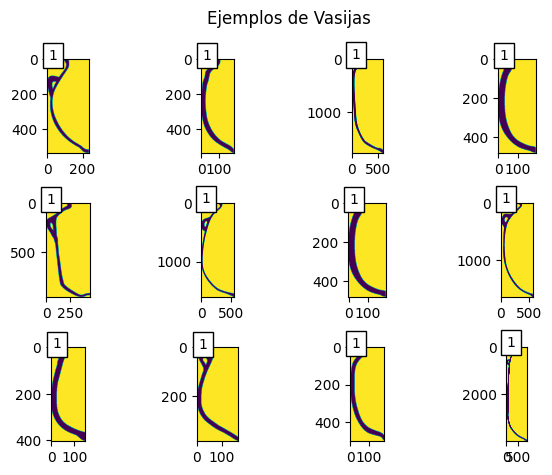

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from aux import show_samples

p = show_samples(images[:12], groundtruth[:12])

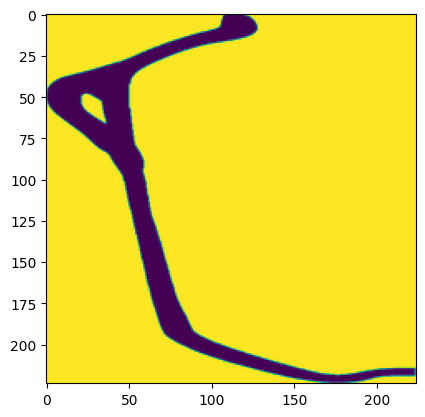

In [4]:
from PIL import Image

imgs_np = [Image.open(img).convert("L") for img in images[:5]]
imgs_resize = [img.resize((224, 224), Image.Resampling.LANCZOS) for img in imgs_np]
plt.imshow(imgs_resize[1])

### Ejercicios

- Mostrar visualizacion en escala de grises.
- Mostrar ejemplos random de vasijas (no en orden secuencial).
- Cambiar forma de imagen a (64, 64)


![func](./figs/cheatsheet.png "Numpy axis")

Figura https://towardsdatascience.com/reshaping-numpy-arrays-in-python-a-step-by-step-pictorial-tutorial-aed5f471cf0b

### Cargar datasets de imagenes en PyTorch
- Estructurar Carpeta en el formato apropiado para que clases como ImageFolder puedan cargar tanto $X$, como $y$.
- Necesitamos definir que transformaciones se aplican a los datos en momento de entrenamiento ($t_{train}$) y evaluacion ($t_{test}$).
- Definir como se consumiran los datos por la red, tamaño del batch, random, que método de selección, etc.

In [5]:
from torchvision import transforms as tfs

transforms_train = [
    tfs.RandomAffine(0.0, scale=(0.5, 1.0)),
    tfs.Resize((16, 16)),
    tfs.Grayscale(1),
]

transforms_test = [tfs.Resize((16, 16)), tfs.Grayscale(1)]

In [6]:
from torchvision import datasets
from torch.utils import data

imagenet_data = datasets.ImageFolder(
    "../data/train/", transform=tfs.Compose(transforms_train)
)

data_loader = data.DataLoader(imagenet_data, batch_size=5, shuffle=True)

(<PIL.Image.Image image mode=L size=16x16 at 0x7F348C75D6A0>, 0)
(<PIL.Image.Image image mode=L size=16x16 at 0x7F348C792880>, 0)
(<PIL.Image.Image image mode=L size=16x16 at 0x7F348C6FAEB0>, 0)
(<PIL.Image.Image image mode=L size=16x16 at 0x7F348C64ABB0>, 0)
(<PIL.Image.Image image mode=L size=16x16 at 0x7F348C619790>, 0)


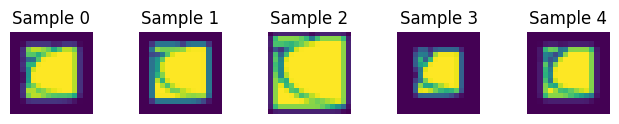

In [7]:
import numpy as np

fig = plt.figure()

for i in range(len(imagenet_data)):
    sample = imagenet_data[i + 10]
    print(sample)
    ax = plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    plt.imshow(np.asarray(sample[0]))
    # print(np.asarray(sample[0]))
    ax.set_title("Sample {}".format(i))
    ax.axis("off")

    if i == 4:
        plt.show()
        break

### Ejercicios

- Usar otras transformaciones e.j. Flip, Rotate, RandomErasing, etc. 
- Crear jerarquía de carpetas para cargar train y test por separado con diferentes transformaciones.